# **Jacob Shearer - Excercise set 5**

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
import scipy.integrate as integrate

**Question 1:**

Part (a):
<br/>
Newton's second law has the following vector form:
$$f^{(0)} = y^{(1)}(t)$$
$$f^{(1)} = \frac{1}{m}F(t, y^{(0)}, y^{(1)})$$
<br/>
where $y^{(0)}$ is the object's position as a function of time and $y^{(1)}$ is the objects's velocity as a function of time. For the case of a projectile under the influence of gravity and a quadratic drag force, the force $F$ is given by:
<br/>
$$\frac{dp}{dt} = F = mg-kv^2 = mg-k(y^{(1)})^2$$
<br/>
and therefore:
$$f^{(0)} = y^{(1)}(t)$$
$$f^{(1)} = g-\frac{k}{m}(y^{(1)})^2$$
<br/>
Finally, if we want to find the projectile's velocity to 4 significant digits of accuracy, we need the error to be confined to the fifth decimal place and beyond. The error for Runge-Kutta 4 scales as $O(h^4)$, and $h = \frac{\text{total time}}{n}$, so 
$$ 0.00001 = h^4 = (\frac{10}{n})^4$$
$$\Rightarrow (0.00001)^{1/4} = \frac{10}{n}$$
$$\Rightarrow n = \frac{10}{(0.00001)^{1/4}} = 177.827941 \text{ steps}$$
I'm going to take 1000 steps.

In [2]:
# Part (a):
def rk4_vector(start, stop, n, eq_vector, initial_state):
    dummy_y = np.zeros(2)
    y = np.zeros(2)
    y[0] = initial_state[0]
    y[1] = initial_state[1]
    tt = np.zeros(n+2)
    yy1 = np.zeros(n+2)
    yy2 = np.zeros(n+2)
    function_return = np.zeros(2)
    k1 = np.zeros(2)
    k2 = np.zeros(2)
    k3 = np.zeros(2)
    k4 = np.zeros(2)
    t = start
    tt[0] = t
    yy1[0] = y[0]
    yy2[0] = y[1]
    h = (stop-start)/n
    j = 0
    
    while t < stop:
        if (t+h) > stop:
            h = stop - t
        
        eq_vector(t, y, function_return)
        k1[0] = h * function_return[0]
        k1[1] = h * function_return[1]
        for i in range(0, 2):
            dummy_y[i] = y[i] + k1[i]/2
            
        eq_vector(t + h/2, dummy_y, function_return) 
        k2[0] = h * function_return[0]
        k2[1] = h * function_return[1] 
        for i in range(0, 2):  
            dummy_y[i] = y[i] + k2[i]/2
        
        eq_vector(t + h/2, dummy_y, function_return)
        k3[0] = h * function_return[0]
        k3[1] = h * function_return[1] 
        for i in range(0, 2):
            dummy_y[i] = y[i] + k3[i]
        
        eq_vector(t + h, dummy_y, function_return) 
        k4[0] = h * function_return[0]
        k4[1] = h * function_return[1]  
        for i in range(0, 2): 
            y[i] = y[i] + (k1[i] + 2*(k2[i] + k3[i]) + k4[i])/6
        
        j+=1 
        t+=h
        tt[j]=t
        yy1[j]=y[0]  
        yy2[j]=y[1]
        
    return [tt, yy1, yy2]
    

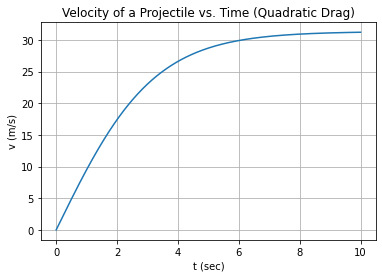

In [3]:
def quad_drag(t, y, function_return):
    g = 9.81
    k = 1e-4
    m = 1e-2
    function_return[0] = y[1]
    function_return[1] = g - (k/m)*(y[1]**2)
    
ode_results = rk4_vector(0, 10, 1000, quad_drag, [0,0])

plt.plot(ode_results[0], ode_results[2])
plt.xlabel('t (sec)')
plt.ylabel('v (m/s)')
plt.grid(True)
plt.title('Velocity of a Projectile vs. Time (Quadratic Drag)')
plt.show()
# Need to check up on the adaptive step sizes thing

Part (b):
<br/>
When $k = 0$, the velocity is simply given by $ v = gt$

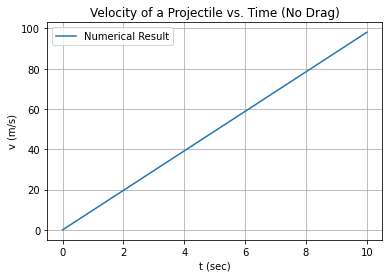

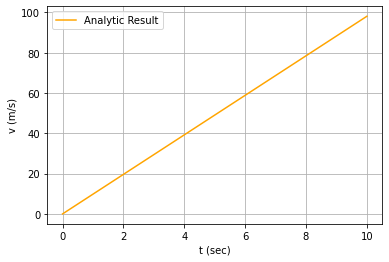

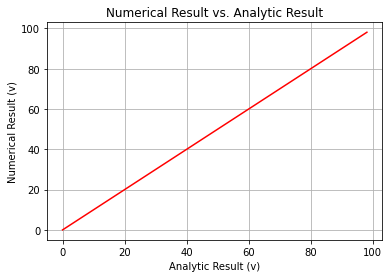

The analytic result and the numerical result appear to line up pretty much perfectly.


In [4]:
def no_drag(t, y, function_return):
    g = 9.81
    k = 0
    m = 1e-2
    function_return[0] = y[1]
    function_return[1] = g - (k/m)*(y[1]**2)
    
ode_results1 = rk4_vector(0, 10, 1000, no_drag, [0,0])

plt.plot(ode_results1[0], ode_results1[2], label='Numerical Result')
plt.xlabel('t (sec)')
plt.ylabel('v (m/s)')
plt.grid(True)
plt.legend()
plt.title('Velocity of a Projectile vs. Time (No Drag)')
plt.show()

plt.plot(ode_results1[0], 9.81*ode_results[0], label='Analytic Result', color='orange')
plt.legend()
plt.xlabel('t (sec)')
plt.ylabel('v (m/s)')
plt.grid(True)
plt.show()

plt.plot(9.81*ode_results[0], ode_results1[2], color='red')
plt.xlabel('Analytic Result (v)')
plt.ylabel('Numerical Result (v)')
plt.title('Numerical Result vs. Analytic Result')
plt.grid(True)
plt.show()

print('The analytic result and the numerical result appear to line up pretty much perfectly.')

**Question 2:**

Part (a):
<br/>
For potentials of this form, 
$$f^{(0)} = y^{(1)}(t)$$
<br/>
$$f^{(1)} = \frac{-k(y^{(0)})^{p-1}}{m}$$

In [5]:
def hook_2(state, t):
    k = 1
    m = 1
    p = 2
    function_return = [0, 0]
    function_return[0] = state[1]
    function_return[1] = (-k*state[0]**(p-1))/m
    return function_return

def hook_4(state, t):
    k = 1
    m = 1
    p = 4
    function_return = [0, 0]
    function_return[0] = state[1]
    function_return[1] = (-k*state[0]**(p-1))/m
    return function_return
    
def hook_8(state, t):
    k = 1
    m = 1
    p = 8
    function_return = [0, 0]
    function_return[0] = state[1]
    function_return[1] = (-k*state[0]**(p-1))/m
    return function_return

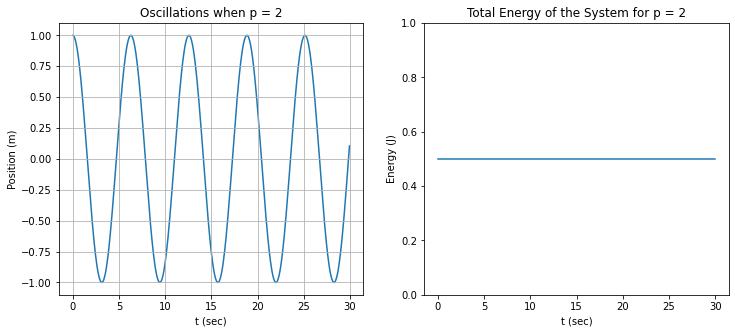

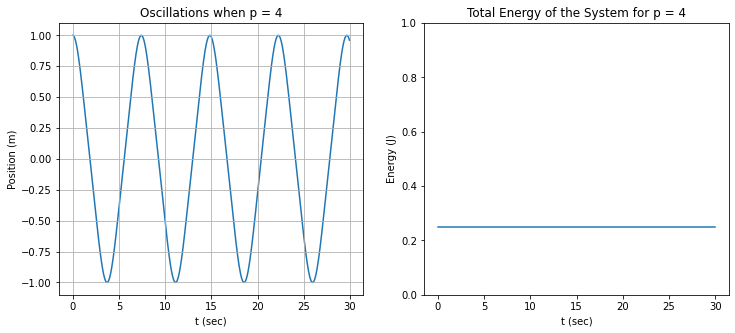

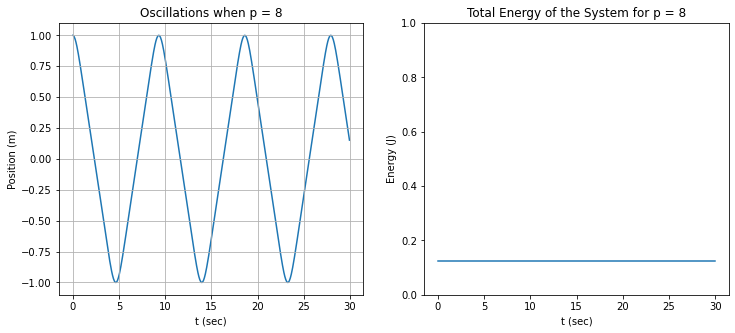

In [6]:
func_list = [hook_2, hook_4, hook_8]
dt = 0.05
t = np.arange(0, 30, dt)
p = 2
for func in func_list:
    m = 1
    k = 1
    initial_conditions = [1, 0]
    ode_results = integrate.odeint(func, initial_conditions, t)
    
    fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,5))
    ax1.plot(t, ode_results[:, 0], zorder=1)
    ax1.set_xlabel('t (sec)')
    ax1.set_ylabel('Position (m)')
    ax1.grid(True)
    ax1.set_title(f'Oscillations when p = {p}')
    
    energy = (1/2)*m*ode_results[:, 1]**2 + (1/p)*k*ode_results[:, 0]**p
    ax2.plot(t, energy)
    ax2.set_xlabel('t (sec)')
    ax2.set_ylabel('Energy (J)')
    ax2.set_ylim(0, 1)
    ax2.set_title(f'Total Energy of the System for p = {p}')
    
    plt.show()
    p *= 2

The slopes of the energy plots for each of the three p values is constant throughout the 30 second time period, therefore energy is conserved throughout systems' oscillation.

Part (b):


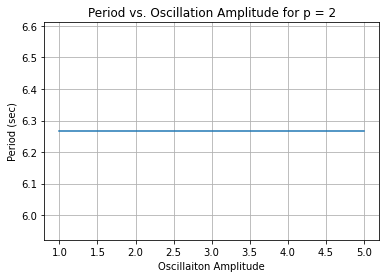

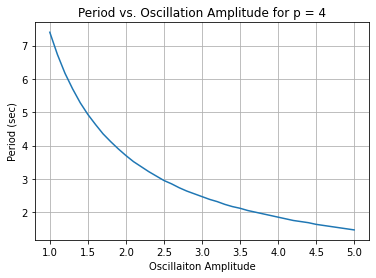

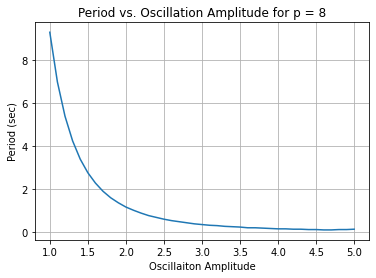

In [7]:
# Part (b):
print('Part (b):')
amplitudes = np.arange(1, 5.1, 0.1)
func_list = [hook_2, hook_4, hook_8]
t = np.arange(0, 30, dt)
p = 2
for func in func_list:
    period_array = []
    for amplitude in amplitudes:
        initial_conditions = [amplitude, 0]
        ode_results = integrate.odeint(func, initial_conditions, t)
        velocities = ode_results[:, 1]
        velocity_sign = np.sign(velocities)
        changes = np.where(np.diff(velocity_sign) == -2)  # Looking for the ends of cycles by looking for sign changes in v
        period = t[changes[0][2]]/3
        period_array.append(period)
    
    plt.plot(amplitudes, period_array)
    plt.xlabel('Oscillaiton Amplitude')
    plt.ylabel('Period (sec)')
    plt.title(f'Period vs. Oscillation Amplitude for p = {p}')
    plt.grid(True)
    plt.show()
    p *= 2